### 같은 화면에 그래프 추가 

- 동일한 객체에 여러 개의 그래프를 추가하는 것도 가능 
- plot() 메소드를 3번 적용

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 
font_path = 'C:\\Users\\jswoo\\Desktop\\Repository\\Study_Data_Science\\Pandas_Data_Analytics\\Part04\\malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)

path = 'C:\\Users\\jswoo\\Desktop\\Repository\\Study_Data_Science\\Pandas_Data_Analytics\\Part04\\시도별 전출입 인구수.xlsx'
df = pd.read_excel(path, header =0, engine='openpyxl')

df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace =True)
df_seoul.set_index('전입지', inplace=True)

sr_one = df_seoul.loc['경기도']

plt.style.use('ggplot')

c:\Users\jswoo\Desktop\Repository\Study_Data_Science\venv\lib\site-packages\ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


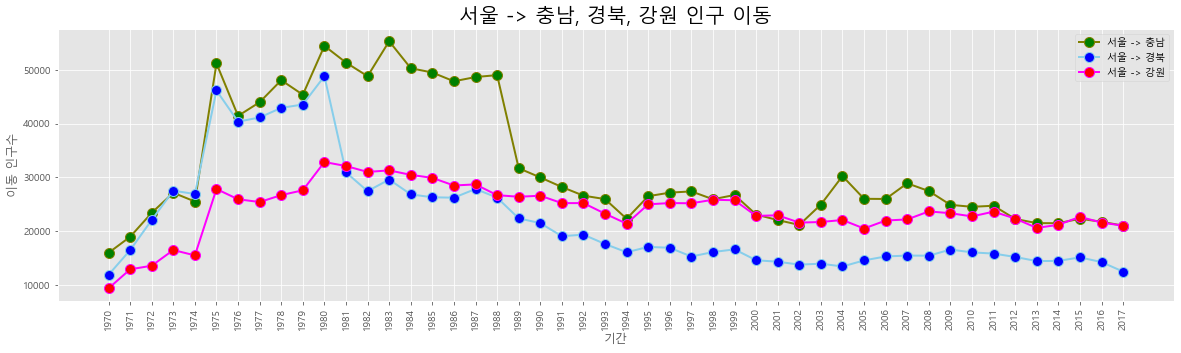

In [2]:
# 서울에서 '충청남도', '경상북도', '강원도'로 이동한 인구 데이터 값 선택
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]

fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(col_years, df_3.loc['충청남도', :], marker = 'o', markerfacecolor = 'green',
        markersize = 10, color = 'olive', linewidth= 2, label = '서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도', :], marker = 'o', markerfacecolor = 'blue',
        markersize = 10, color = 'skyblue', linewidth= 2, label = '서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도', :], marker = 'o', markerfacecolor = 'red',
        markersize = 10, color = 'magenta', linewidth= 2, label = '서울 -> 강원')
ax.legend(loc = 'best')

ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size = 20)

ax.set_xlabel('기간', size = 12)
ax.set_ylabel('이동 인구수', size = 12)

ax.set_xticklabels(col_years, rotation = 90)

ax.tick_params(axis = "x", labelsize = 10)
ax.tick_params(axis = "y", labelsize = 10)

plt.show()